In [3]:
import pandas as pd
import re

In [4]:
pattern = r'\(([A-Z]{3})\)'

# Fichier brut
input_file_path = 'data/train.txt'
output_file_path = 'data/clean.txt'

with open(input_file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
    # Read each line from the input file
    for line in input_file:
        # Apply regex pattern and replace
        modified_line = re.sub(pattern, r'\1\t', line)
        
        # Write the modified line to the output file
        output_file.write(modified_line)
df = pd.read_csv('data/clean.txt', sep='\t', header=None)
df.columns = ['Lang', 'Text']
df.to_csv('data/train.csv', index=False)
df.head()

,Lang,Text
0,GER,IThe importance and popularity of travelling ...
1,TUR,"It is an important decision , how to plan you..."
2,CHI,Some people believe that young people can enj...
3,TEL,Travelling is usually considered as good recr...
4,ARA,i agree that . Life is a person live period o...


In [6]:
for i in df["Lang"].unique():
    df[df["Lang"] == i].to_csv(f"data/{i}.csv", index=False)

In [7]:
lang = df["Lang"].unique()
lang

array(['GER', 'TUR', 'CHI', 'TEL', 'ARA', 'SPA', 'HIN', 'JPN', 'KOR',
       'FRE', 'ITA'], dtype=object)

In [16]:
lang = df["Lang"].unique()
res = {}
for l in lang:
    res[l] = {}

for i in df["Lang"].unique():
    res[i]["nb"] = df[df["Lang"] == i]["Lang"].count()
    res[i]["moy length"] = df[df["Lang"] == i]["Text"].str.len().mean()
    res[i]["max length"] = df[df["Lang"] == i]["Text"].str.len().max()
    res[i]["min length"] = df[df["Lang"] == i]["Text"].str.len().min()
    res[i]["esperance length"] = df[df["Lang"] == i]["Text"].str.len().std()
    res[i]["moy nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().mean()
    res[i]["max nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().max()
    res[i]["min nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().min()
    res[i]["esperance nb mot"] = df[df["Lang"] == i]["Text"].str.split().str.len().std()
    res[i]["moy nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().mean()
    res[i]["max nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().max()
    res[i]["min nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().min()
    res[i]["esperance nb phrase"] = df[df["Lang"] == i]["Text"].str.split(".").str.len().std()
    

    print(  
        "lang =", i, ", nb=", round(df[df["Lang"] == i]["Lang"].count(), 3), 
        ", moy length=", round(df[df["Lang"] == i]["Text"].str.len().mean(), 3), 
        ", max length=", round(df[df["Lang"] == i]["Text"].str.len().max(), 3),
        ", min length=", round(df[df["Lang"] == i]["Text"].str.len().min(), 3),
        ", esperance length=", round(df[df["Lang"] == i]["Text"].str.len().std(), 3),
        ", moy nb mot :", round(df[df["Lang"] == i]["Text"].str.split().str.len().mean(), 3),
        ", max nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().max(), 3),
        ", min nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().min(), 3),
        ", esperance nb mot:", round(df[df["Lang"] == i]["Text"].str.split().str.len().std(), 3),
        ", moy nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().mean(), 3),
        ", max nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().max(), 3),
        ", min nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().min(), 3),
        ", esperance nb phrase:", round(df[df["Lang"] == i]["Text"].str.split(".").str.len().std(), 3),
    )


lang = GER , nb= 900 , moy length= 1953.983 , max length= 4142 , min length= 334 , esperance length= 367.666 , moy nb mot : 376.533 , max nb mot: 806 , min nb mot: 63 , esperance nb mot: 69.772 , moy nb phrase: 18.434 , max nb phrase: 40 , min nb phrase: 5 , esperance nb phrase: 4.336
lang = TUR , nb= 900 , moy length= 1842.998 , max length= 4155 , min length= 69 , esperance length= 437.412 , moy nb mot : 352.671 , max nb mot: 776 , min nb mot: 15 , esperance nb mot: 83.303 , moy nb phrase: 18.611 , max nb phrase: 44 , min nb phrase: 1 , esperance nb phrase: 5.567
lang = CHI , nb= 900 , moy length= 1853.389 , max length= 4621 , min length= 92 , esperance length= 432.715 , moy nb mot : 361.812 , max nb mot: 876 , min nb mot: 16 , esperance nb mot: 82.095 , moy nb phrase: 18.448 , max nb phrase: 38 , min nb phrase: 2 , esperance nb phrase: 5.329
lang = TEL , nb= 900 , moy length= 1901.13 , max length= 4074 , min length= 748 , esperance length= 386.245 , moy nb mot : 359.039 , max nb mot:

In [27]:
df["length"] = df["Text"].str.len()
df["mot"] = df["Text"].str.split().str.len()
df["phrase"] = df["Text"].str.split(".").str.len()

# Machine learning

## imports

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import numpy as np
from scipy.sparse import hstack
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Metrics

In [1]:
def display_results(y_test, y_pred):
    
    average_param = "macro"
    print("Accuracy ", accuracy_score(y_test, y_pred))

    print("Precision -", average_param)
    print("precision score ", precision_score(y_test, y_pred, average=average_param, zero_division=1))

    print("Recall -", average_param)
    print("recall score ",   recall_score(y_test, y_pred, average=average_param, zero_division=1))
    
    print("F1 -", average_param)
    print("f1 score ", f1_score(y_test, y_pred, average=average_param, zero_division=1))

## Label encoder

In [6]:
def get_label_encoder(y):
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(y)
    labels = {}

    for a in y.unique():
        labels[a] = label_encoder.transform([a])[0]
    return label_encoder, labels

label_encoder, labels = get_label_encoder(df["Lang"])
labels

{'GER': 3,
 'TUR': 10,
 'CHI': 1,
 'TEL': 9,
 'ARA': 0,
 'SPA': 8,
 'HIN': 4,
 'JPN': 6,
 'KOR': 7,
 'FRE': 2,
 'ITA': 5}

## Split data

In [7]:
def get_train_dev_test(X, y):
    X_train, X_mid, y_train, y_mid = train_test_split(X, y, test_size=0.2, random_state=42)

    X_dev, X_test, y_dev, y_test = train_test_split(X_mid, y_mid, test_size=0.5, random_state=42)

    return X_train, X_dev, X_test, y_train, y_dev, y_test

X = df["Text"]
y = df["Lang"]

X_train, X_dev, X_test, y_train, y_dev, y_test = get_train_dev_test(X, y)

In [104]:
print(X_train.head(5))
print(y_train.head(5))
print(X_dev.head(5))
print(y_dev.head(5))
print(X_test.head(5))
print(y_test.head(5))   

6144     It is important to have an idea of many acade...
2584     I agree that the most advertisement make prod...
9227     Is it more importent for students to understa...
6865     I will be honest , I never thought about such...
5731     Through today 's environment situation , I re...
Name: Text, dtype: object
6144    ARA
2584    TUR
9227    ARA
6865    GER
5731    CHI
Name: Lang, dtype: object
1707     Now-a-days the generation has been changed to...
712      The world has changed drastically since the i...
1236     As cars are partly responsible for pollution ...
698      Have you ever benefited from the broad knowle...
107      To predict what will happen in the future is ...
Name: Text, dtype: object
1707    TEL
712     ARA
1236    FRE
698     CHI
107     KOR
Name: Lang, dtype: object
359      I do not agree the opinion that young people ...
608      I absolutely agree with this statement . In m...
437      Advertisements are increasingly present in ou...
431      I completely 

## Generic Function to test a model and vectorizer

In [8]:
def train_one_model(vectorizer, model, label_encoder, X_train, y_train, X_dev, y_dev, X_test, y_test):

    X_train_vect = vectorizer.fit_transform(X_train)
    X_dev_vect = vectorizer.transform(X_dev)
    X_test_vect = vectorizer.transform(X_test)

    y_train_labels = label_encoder.transform(y_train)
    y_dev_labels = label_encoder.transform(y_dev)
    y_test_labels = label_encoder.transform(y_test)

    model.fit(X_train_vect, y_train_labels)

    y_pred_dev = model.predict(X_dev_vect)
    accuracy_dev = accuracy_score(y_dev_labels, y_pred_dev)
    print(f"Accuracy DEV {vectorizer} et {model}: {accuracy_dev:.3f}")
    print(f"{display_results(y_dev_labels, y_pred_dev)}")
    
    y_pred_test = model.predict(X_test_vect)

    # Calcul de l'accuracy sur les données de test
    accuracy_test = accuracy_score(y_test_labels, y_pred_test)
    print(f"Accuracy TEST {vectorizer} et {model}: {accuracy_test:.3f}")
    print(f"{display_results(y_test_labels, y_pred_test)}")

## Logistic Regression

In [9]:
train_one_model(CountVectorizer(), LogisticRegression(), label_encoder, X_train, y_train, X_dev, y_dev, X_test, y_test)

Accuracy DEV CountVectorizer() et LogisticRegression(): 0.648
Accuracy  0.6484848484848484
Precision - macro
precision score  0.6477253888668594
Recall - macro
recall score  0.6485735859537961
F1 - macro
f1 score  0.6472968882092315
None
Accuracy TEST CountVectorizer() et LogisticRegression(): 0.653
Accuracy  0.6525252525252525
Precision - macro
precision score  0.6531864934139602
Recall - macro
recall score  0.6559605318536582
F1 - macro
f1 score  0.6532492267503616
None


/home/alan/Documents/repos/lang_detection/.lang_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Cross Validation

## Shuffle

In [21]:
for i in df["Lang"].unique():
    df_ara = pd.read_csv(f"data/{i}.csv")
    df_ara.sample(frac=1).reset_index(drop=True).to_csv(f"data/{i}.csv", index=False)

In [22]:
import pandas as pd
import glob
import random

files = glob.glob("data/*.csv")

# Read lines from each file
lines_from_each_file = []
for file_path in files:
    with open(file_path, 'r') as file:
        lines = file.readlines()[1:]
        lines_from_each_file.append(lines)

# Alternate lines from each file with random order in each cycle
combined_lines = []
num_lines = len(lines_from_each_file[0])
for i in range(num_lines):
    # Shuffle the order of files for each line
    random.shuffle(lines_from_each_file)

    # Add one line from each file in the shuffled order
    for lines in lines_from_each_file:
        combined_lines.append(lines[i])

# Create DataFrame
df = pd.DataFrame([line.split(r',"') for line in combined_lines])
df.drop(columns=[2], inplace=True)
df.head(15)


,0,1
0,FRE,"It might be confusing at first , or might be ..."
1,GER,IThe importance and popularity of travelling ...
2,CHI,I agree this statement . Young people are too...
3,SPA,i am desagree with the sentence that the best...
4,ITA,In the last years this topic became very actu...
5,TEL,"In twenty years from now , there is a high po..."
6,KOR,"Nowadays , it is said that youngsters are not..."
7,ARA,It is known that as human beings we are set a...
8,GER,In my opinion it is in general better when yo...
9,JPN,Young people enjoy life more than older peopl...


In [23]:
tel = pd.read_csv("data/TEL.csv")
hin = pd.read_csv("data/HIN.csv")
chi = pd.read_csv("data/CHI.csv")
fre = pd.read_csv("data/FRE.csv")
ita = pd.read_csv("data/ITA.csv")

tel_hin = pd.concat([tel, hin])
tel_hin

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(tel_hin["Text"])
y = tel_hin["Lang"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_scaled = scaler.transform(X_train)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y_train.values.ravel())

# Make predictions on the test set
# scaler = preprocessing.StandardScaler(with_mean=False).fit(X_test)
y_pred = model.predict(scaler.transform(X_test))

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


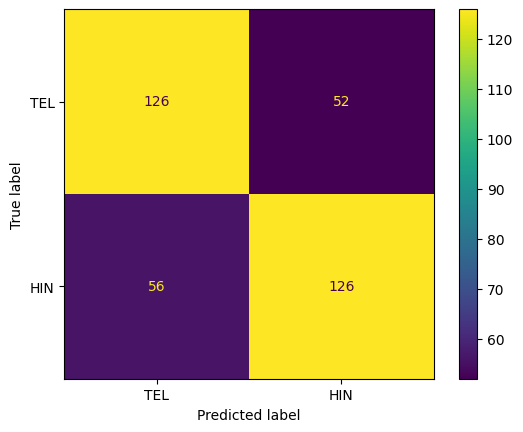

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_test, labels=tel_hin["Lang"].unique()), display_labels=tel_hin["Lang"].unique()).plot()

# SVM

In [28]:
from sklearn.svm import SVC

# Vectorize the text and combine with other numerical features
vectorizer = TfidfVectorizer()
X_text = vectorizer.fit_transform(df['Text'])
X_other_numerical = df[["mot", "length", "phrase"]].values
X_all = hstack((X_text, X_other_numerical))

X_train, X_test, y_train, y_test = train_test_split(X_text, df[["Lang"]], test_size=0.4, random_state=42)

scaler = preprocessing.StandardScaler(with_mean=False).fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC()
svm_model.fit(X_scaled_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = svm_model.predict(X_scaled_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
